In [13]:
import tensorflow as tf

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  zoom_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')

In [16]:
path_train = '../input/cat-and-dog/training_set/training_set'
train = train_datagen.flow_from_directory(path_train, target_size = (64,64), batch_size = 64, class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [17]:
test_datagen = ImageDataGenerator(rescale = 1/255)
path_test = '../input/cat-and-dog/test_set/test_set'
test = test_datagen.flow_from_directory(path_test, target_size = (64,64), batch_size = 64, class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64,64,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

In [24]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)             

In [26]:
history = model.fit_generator(train, validation_data = test, epochs = 50 ,verbose = 1)

Epoch 1/50
126/126 [==============================] - 77s 611ms/step - loss: 0.6809 - accuracy: 0.5608 - val_loss: 0.6661 - val_accuracy: 0.5704
Epoch 2/50
126/126 [==============================] - 79s 628ms/step - loss: 0.6350 - accuracy: 0.6430 - val_loss: 0.6060 - val_accuracy: 0.6565
Epoch 3/50
126/126 [==============================] - 79s 624ms/step - loss: 0.6108 - accuracy: 0.6707 - val_loss: 0.5926 - val_accuracy: 0.6920
Epoch 4/50
126/126 [==============================] - 79s 625ms/step - loss: 0.5933 - accuracy: 0.6822 - val_loss: 0.6147 - val_accuracy: 0.6831
Epoch 5/50
126/126 [==============================] - 79s 625ms/step - loss: 0.5628 - accuracy: 0.7109 - val_loss: 0.5272 - val_accuracy: 0.7346
Epoch 6/50
126/126 [==============================] - 79s 624ms/step - loss: 0.5661 - accuracy: 0.7089 - val_loss: 0.5058 - val_accuracy: 0.7538
Epoch 7/50
126/126 [==============================] - 78s 619ms/step - loss: 0.5427 - accuracy: 0.7183 - val_loss: 0.5492 - val_ac

NameError: name 'val_aacuracy' is not defined

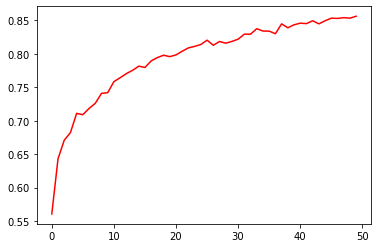

In [27]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, c = 'red', label = "Training Accuracy")
plt.plot(epochs, val_accuracy, c = 'blue', label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(epochs, loss, c = 'red', label = "Training Loss")
plt.plot(epochs, val_loss, c = 'blue', label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()